In [6]:
# Imports
import pandas as pd
import lumos.calculator
import lumos.conversions
import numpy as np
import astropy.time
import astropy.coordinates
import scipy.stats
import matplotlib.pyplot as plt
import satellite_models.diffuse_sphere as diffuse_sphere
import satellite_models.starlink_v1p5 as starlink_v1p5

In [7]:
data = pd.read_csv("../data/pomenis_observations.csv", comment = "#")

satellite_heights = 1000 * (data['satellite_height'].to_numpy())
observation_times = data['observation_time'].to_numpy()
satellite_altitudes = data['satellite_altitude'].to_numpy()
satellite_azimuths = data['satellite_azimuth'].to_numpy()
measured_magnitudes = data['ab_magnitude'].to_numpy()

mount_lemmon = astropy.coordinates.EarthLocation(lat = 32.4434, lon = -110.7881)

In [8]:
observation_times_rolled = []
for i in observation_times:
    time_delta = astropy.time.TimeDelta(3600*4, format='sec')
    observation_time_indi = astropy.time.Time(i, format = 'isot')
    total = observation_time_indi + time_delta
    observation_times_rolled.append(total)

observation_times = observation_times_rolled

In [9]:
for i, (sat_alt, sat_az, sat_h, time) in \
    enumerate(zip(satellite_altitudes, satellite_azimuths, satellite_heights, observation_times)):
    obs_x, obs_y, obs_z, angle_past_terminator = lumos.calculator.get_brightness_coords(sat_alt, sat_az, sat_h,
                                                                       np.radians(10), np.radians(100))
        

In [10]:
x, y, z, nx, ny, nz, areas = lumos.calculator.get_earthshine_panels(sat_h, angle_past_terminator, 10)

In [11]:
R = lumos.constants.EARTH_RADIUS

In [12]:
max_angle = np.arcsin(R/(sat_h + R))

In [14]:
max_angle = np.arccos(R / sat_h)

/var/folders/8p/5731jz1n2rb34n99zjc89td80000gn/T/ipykernel_12775/1401720479.py:1: RuntimeWarning: invalid value encountered in arccos
  max_angle = np.arccos(R / sat_h)


In [11]:
angles_off_plane = np.linspace(-max_angle, max_angle, 100)

In [12]:
angles_off_plane

array([-1.17246677, -1.14878057, -1.12509437, -1.10140817, -1.07772198,
       -1.05403578, -1.03034958, -1.00666338, -0.98297719, -0.95929099,
       -0.93560479, -0.9119186 , -0.8882324 , -0.8645462 , -0.84086   ,
       -0.81717381, -0.79348761, -0.76980141, -0.74611521, -0.72242902,
       -0.69874282, -0.67505662, -0.65137043, -0.62768423, -0.60399803,
       -0.58031183, -0.55662564, -0.53293944, -0.50925324, -0.48556704,
       -0.46188085, -0.43819465, -0.41450845, -0.39082226, -0.36713606,
       -0.34344986, -0.31976366, -0.29607747, -0.27239127, -0.24870507,
       -0.22501887, -0.20133268, -0.17764648, -0.15396028, -0.13027409,
       -0.10658789, -0.08290169, -0.05921549, -0.0355293 , -0.0118431 ,
        0.0118431 ,  0.0355293 ,  0.05921549,  0.08290169,  0.10658789,
        0.13027409,  0.15396028,  0.17764648,  0.20133268,  0.22501887,
        0.24870507,  0.27239127,  0.29607747,  0.31976366,  0.34344986,
        0.36713606,  0.39082226,  0.41450845,  0.43819465,  0.46

In [14]:
angles_on_plane = np.linspace(angle_past_terminator, max_angle, 100)

In [15]:
angles_on_plane

array([0.04628717, 0.05766272, 0.06903827, 0.08041382, 0.09178937,
       0.10316493, 0.11454048, 0.12591603, 0.13729158, 0.14866713,
       0.16004268, 0.17141823, 0.18279379, 0.19416934, 0.20554489,
       0.21692044, 0.22829599, 0.23967154, 0.2510471 , 0.26242265,
       0.2737982 , 0.28517375, 0.2965493 , 0.30792485, 0.3193004 ,
       0.33067596, 0.34205151, 0.35342706, 0.36480261, 0.37617816,
       0.38755371, 0.39892926, 0.41030482, 0.42168037, 0.43305592,
       0.44443147, 0.45580702, 0.46718257, 0.47855813, 0.48993368,
       0.50130923, 0.51268478, 0.52406033, 0.53543588, 0.54681143,
       0.55818699, 0.56956254, 0.58093809, 0.59231364, 0.60368919,
       0.61506474, 0.62644029, 0.63781585, 0.6491914 , 0.66056695,
       0.6719425 , 0.68331805, 0.6946936 , 0.70606915, 0.71744471,
       0.72882026, 0.74019581, 0.75157136, 0.76294691, 0.77432246,
       0.78569802, 0.79707357, 0.80844912, 0.81982467, 0.83120022,
       0.84257577, 0.85395132, 0.86532688, 0.87670243, 0.88807

In [17]:
d_phi = abs(angles_off_plane[1] - angles_off_plane[0])
d_phi

0.023686197293326883

In [18]:
d_theta = abs(angles_on_plane[1] - angles_on_plane[0])
d_theta

0.011375551489243317

In [19]:
angles_on_plane, angles_off_plane = np.meshgrid(angles_on_plane, angles_off_plane)
angles_on_plane, angles_off_plane = angles_on_plane.flatten(), angles_off_plane.flatten()

In [20]:
angles_on_plane

array([0.04628717, 0.05766272, 0.06903827, ..., 1.14971566, 1.16109121,
       1.17246677])

In [22]:
nz = 1 / np.sqrt(1 + np.tan(angles_on_plane)**2 + np.tan(angles_off_plane)**2)
nx = np.tan(angles_off_plane) * nz
ny = np.tan(angles_on_plane) * nz

In [32]:
visible_to_sat = np.arccos(nz) < max_angle
angles_off_plane, angles_on_plane = angles_off_plane[visible_to_sat], angles_on_plane[visible_to_sat]
nx, ny, nz = nx[visible_to_sat], ny[visible_to_sat], nz[visible_to_sat]

x, y, z = nx * R, ny * R, nz * R


In [33]:
phi = angles_off_plane
theta = angles_on_plane

dx_dr = nx / nz * z / R
dx_dphi = z**3 / (R**2 * np.cos(phi)**2 * np.cos(theta)**2)
dx_dtheta = - (ny / nz * nx / nz * z**3) / (R**2 * np.cos(theta)**2)

dy_dr = np.tan(theta) * z / R
dy_dphi = - (ny / nz * nx / nz * z**3) / (R**2 * np.cos(phi)**2)
dy_dtheta = dx_dphi

dz_dr = z / R
dz_dphi = - (nx / nz * z**3) / (R**2 * np.cos(phi)**2)
dz_dtheta = - (ny / nz * z**3) / (R**2 * np.cos(theta)**2)

In [35]:
determinant = (
    dx_dr * (dy_dphi * dz_dtheta - dy_dtheta * dz_dphi) -
    dy_dr * (dx_dphi * dz_dtheta - dx_dtheta * dz_dphi) +
    dz_dr * (dx_dphi * dy_dtheta - dx_dtheta * dy_dphi))

areas = determinant * d_phi * d_theta

In [4]:
intensities_diffuse_sphere = np.zeros_like(measured_magnitudes)
intensities_lab_brdfs = np.zeros_like(measured_magnitudes)
intensities_inferred_brdfs = np.zeros_like(measured_magnitudes)

sun_alts = []
for i, (sat_alt, sat_az, sat_h, time) in \
    enumerate(zip(satellite_altitudes, satellite_azimuths, satellite_heights, observation_times)):
    
    observation_time = astropy.time.Time(time, format = 'isot')
    sun_alt, sun_az = lumos.calculator.get_sun_alt_az(observation_time, mount_lemmon)
    sun_alts.append(sun_alt)
    intensities_diffuse_sphere[i] = \
        diffuse_sphere.get_intensity(0.65, sat_h, sat_alt, sat_az, sun_alt, sun_az)
    
    intensities_lab_brdfs[i] = \
        lumos.calculator.get_intensity_observer_frame(
            starlink_v1p5.SURFACES_LAB_BRDFS,
            sat_h, sat_alt, sat_az, sun_alt, sun_az,
            include_earthshine = True)
    
    intensities_inferred_brdfs[i] = \
        lumos.calculator.get_intensity_observer_frame(
            starlink_v1p5.SURFACES_INFER_BRDFS,
            sat_h, sat_alt, sat_az, sun_alt, sun_az,
            include_earthshine = True)

magnitudes_diffuse_sphere = lumos.conversions.intensity_to_ab_mag(intensities_diffuse_sphere)
magnitudes_lab_brdfs = lumos.conversions.intensity_to_ab_mag(intensities_lab_brdfs)
magnitudes_inferred_brdfs = lumos.conversions.intensity_to_ab_mag(intensities_inferred_brdfs)

TypeError: 'NoneType' object is not callable

In [5]:
chi_square_statistic = lambda modeled, measured : np.sum( (modeled - measured)**2 / measured ) / len(measured)

Our Model (Lab BRDFs), R = 0.13
Our Model (Lab BRDFs), X^2 = 5.63
Our Model (Best-Fit BRDFs), R = 0.09
Our Model (Best-Fit BRDFs), X^2 = 5.60
Diffuse Sphere, R = 0.07
Diffuse Sphere, X^2 = 3.85


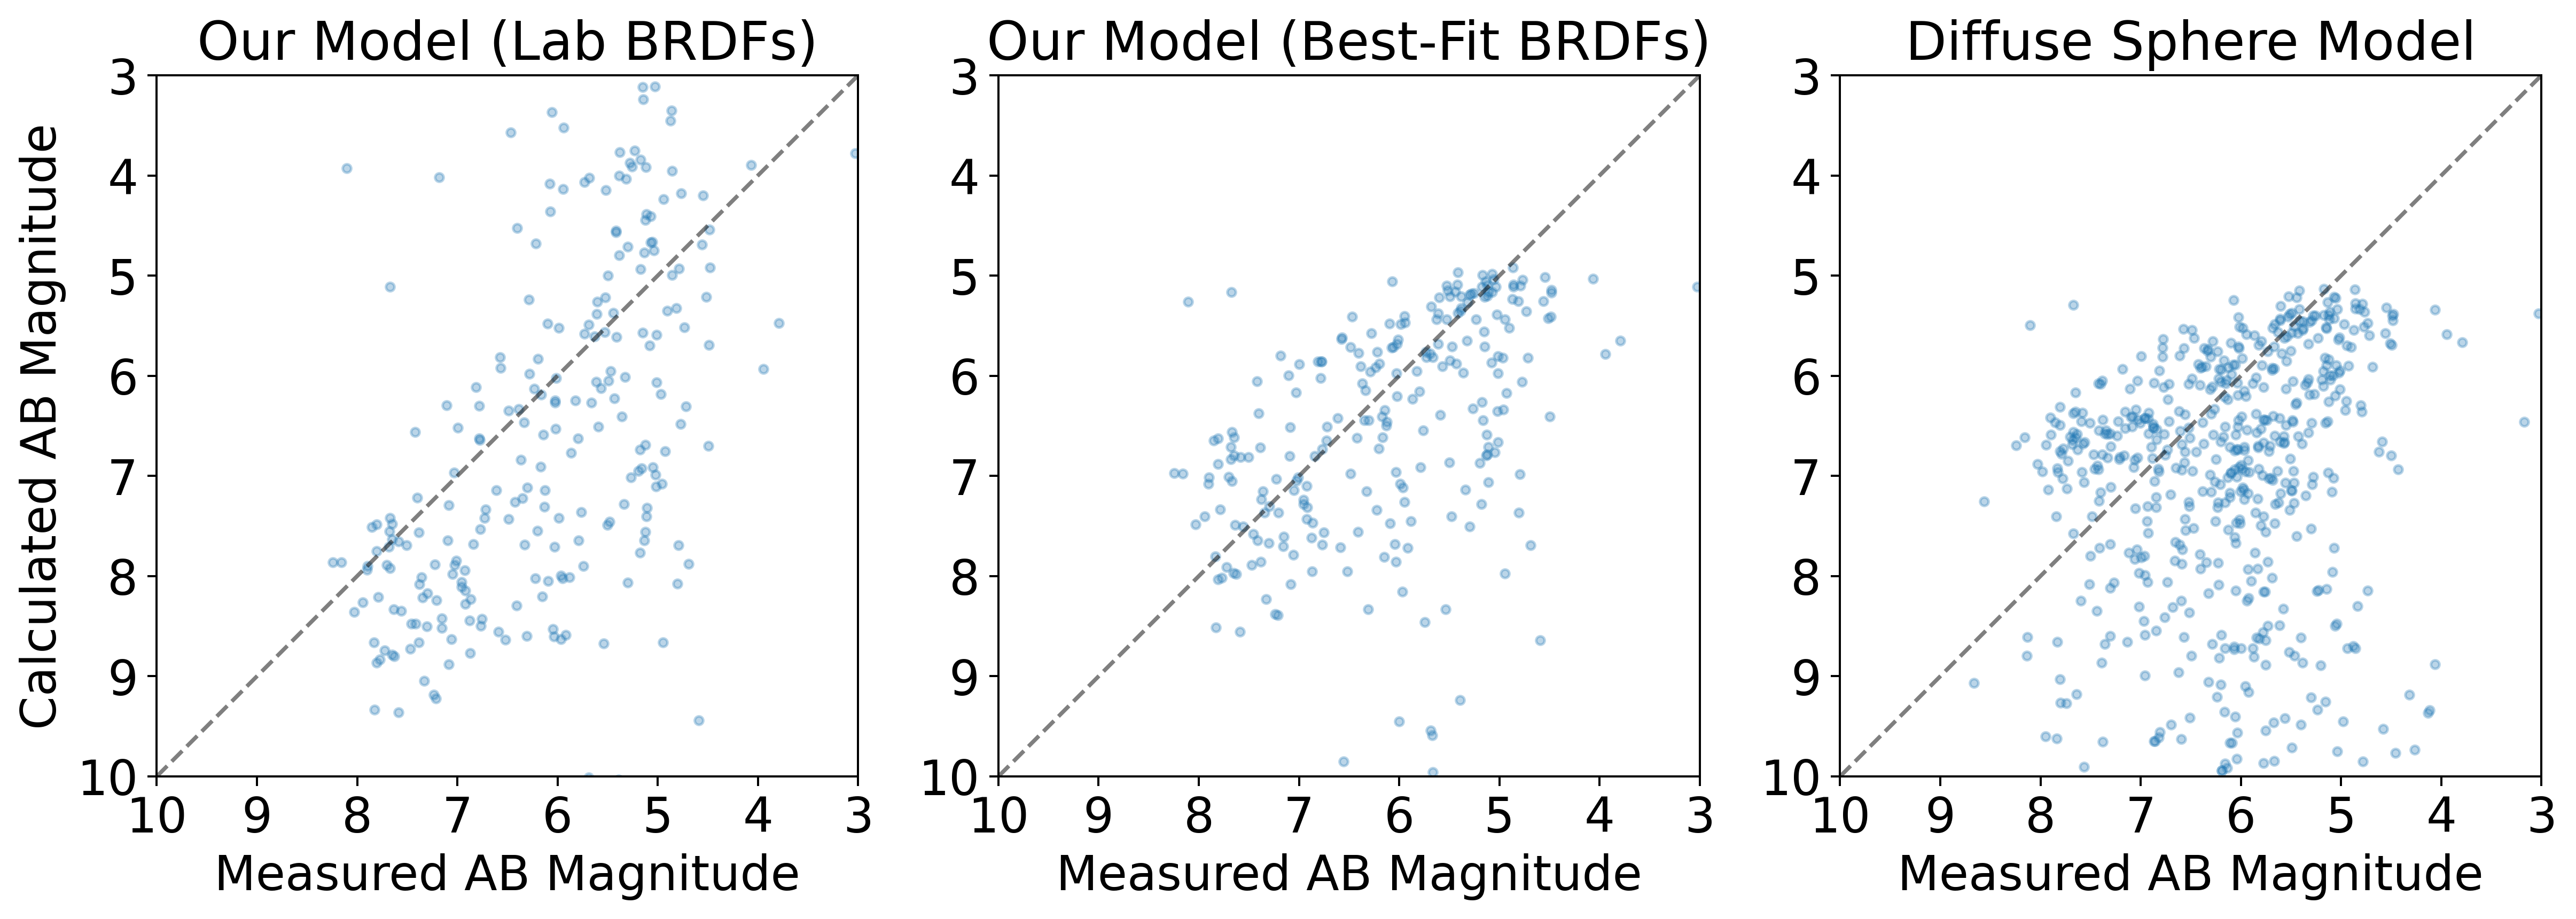

In [6]:
fig, axs = plt.subplots(1, 3, figsize = (16, 5), dpi = 360, sharex = True)
ax1, ax2, ax3 = axs

for ax in axs:
    ax.set_xlim((3, 10))
    ax.set_ylim((3, 10))
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.set_aspect("equal")
    ax.set_xlabel("Measured AB Magnitude", fontsize = 18)
    ax.set_ylabel("Calculated AB Magnitude", fontsize = 18)
    ax.plot([10, 2], [10, 2], '--k', alpha = 0.5)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xticks([10, 9, 8, 7, 6, 5, 4, 3])
    ax.set_yticks([10, 9, 8, 7, 6, 5, 4, 3])

ax2.set_ylabel("")
ax3.set_ylabel("")

ax1.scatter(measured_magnitudes,
            magnitudes_lab_brdfs,
            color = '#1f77b4',
            alpha = 0.3,
            s = 10)

corr, _ = scipy.stats.pearsonr(magnitudes_lab_brdfs, measured_magnitudes)
chi_sq = chi_square_statistic(magnitudes_lab_brdfs, measured_magnitudes)
print(f"Our Model (Lab BRDFs), R = {corr:0.2f}")
print(f"Our Model (Lab BRDFs), X^2 = {chi_sq:0.2f}")

ax1.set_title("Our Model (Lab BRDFs)", fontsize = 20)

ax2.scatter(measured_magnitudes,
            magnitudes_inferred_brdfs,
            color = '#1f77b4',
            alpha = 0.3,
            s = 10)

corr, _ = scipy.stats.pearsonr(magnitudes_inferred_brdfs, measured_magnitudes)
chi_sq = chi_square_statistic(magnitudes_inferred_brdfs, measured_magnitudes)
print(f"Our Model (Best-Fit BRDFs), R = {corr:0.2f}")
print(f"Our Model (Best-Fit BRDFs), X^2 = {chi_sq:0.2f}")

ax2.set_title("Our Model (Best-Fit BRDFs)", fontsize = 20)

ax3.scatter(measured_magnitudes,
            magnitudes_diffuse_sphere,
            color = '#1f77b4',
            alpha = 0.3,
            s = 10)

corr, _ = scipy.stats.pearsonr(magnitudes_diffuse_sphere, measured_magnitudes)
chi_sq = chi_square_statistic(magnitudes_diffuse_sphere, measured_magnitudes)
print(f"Diffuse Sphere, R = {corr:0.2f}")
print(f"Diffuse Sphere, X^2 = {chi_sq:0.2f}")
ax3.set_title("Diffuse Sphere Model", fontsize = 20)

plt.show()

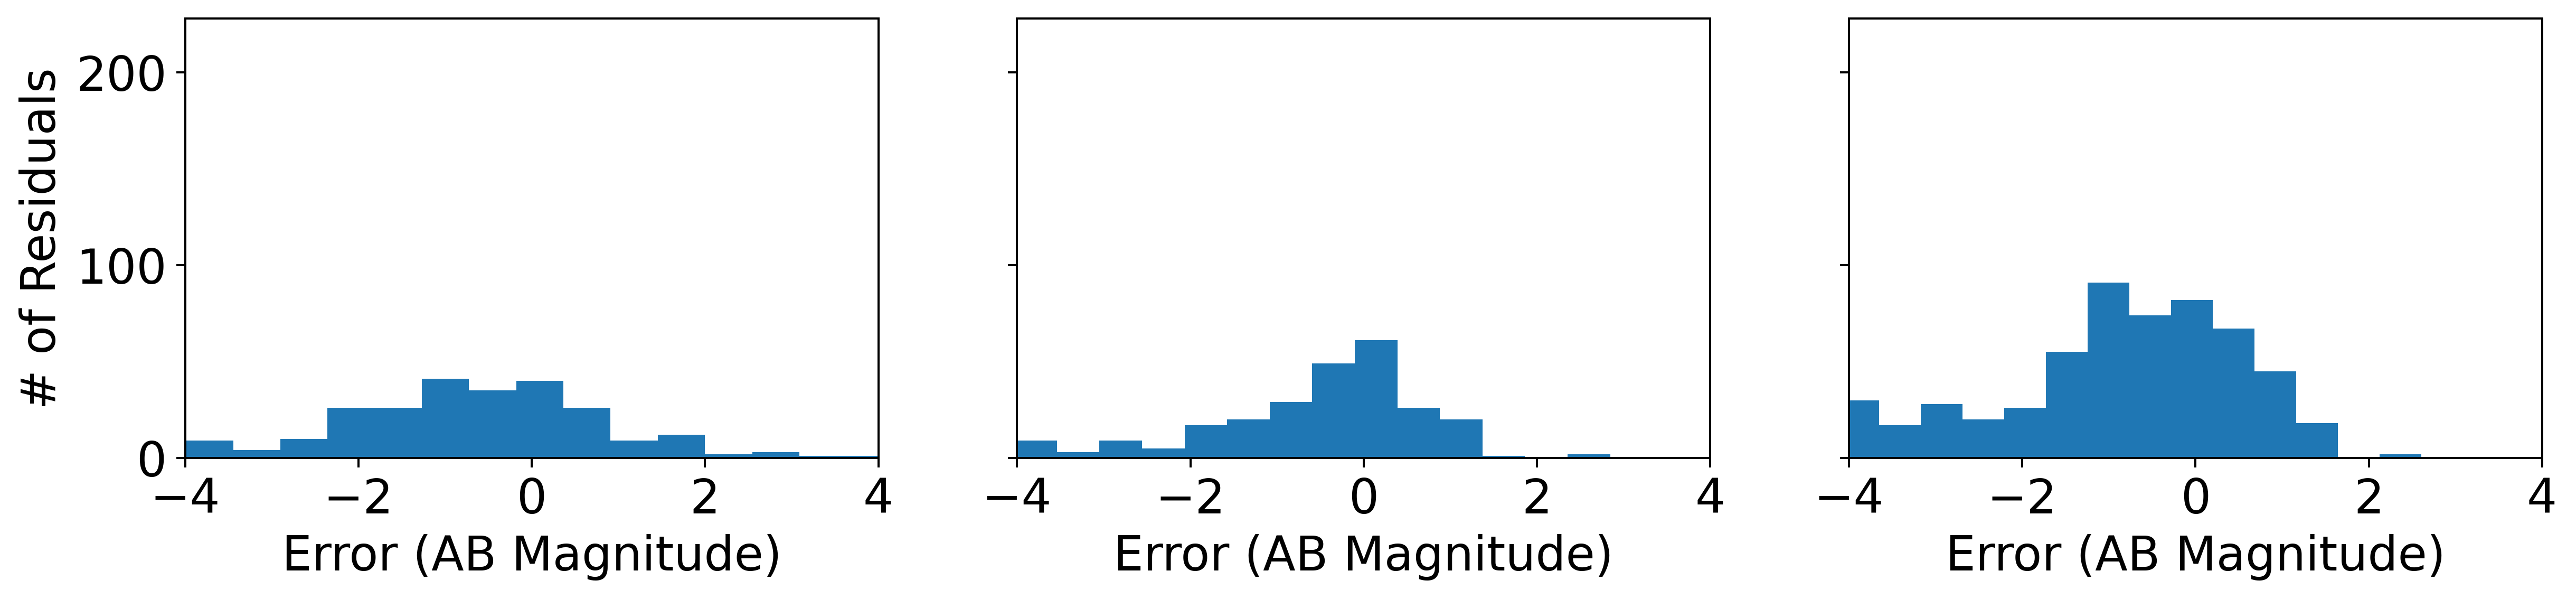

In [7]:
fig, axs = plt.subplots(1, 3, figsize = (16, 3), dpi = 360, sharey = True)
ax1, ax2, ax3 = axs

for ax in axs:
    ax.set_xlim((-4, 4))
    ax.set_xlabel("Error (AB Magnitude)", fontsize = 18)
    ax.set_ylabel("# of Residuals", fontsize = 18)
    ax.tick_params(axis='both', which='major', labelsize=18)

ax2.set_ylabel("")
ax3.set_ylabel("")

ax1.hist(measured_magnitudes - magnitudes_lab_brdfs, bins = 25)
#ax1.set_title("Our Model (Lab BRDFs)", fontsize = 20)

ax2.hist(measured_magnitudes - magnitudes_inferred_brdfs, bins = 25)
#ax2.set_title("Our Model (Inferred BRDFs)", fontsize = 20)

ax3.hist(measured_magnitudes - magnitudes_diffuse_sphere, bins = 25)
#ax3.set_title("Diffuse Sphere Model", fontsize = 20)
plt.show()

(array([103., 144., 136.,  53.,  56.,  33.,  31.,  30.,  25., 562.]),
 array([ 5.13422242,  5.87080018,  6.60737794,  7.3439557 ,  8.08053345,
         8.81711121,  9.55368897, 10.29026673, 11.02684448, 11.76342224,
        12.5       ]),
 <BarContainer object of 10 artists>)

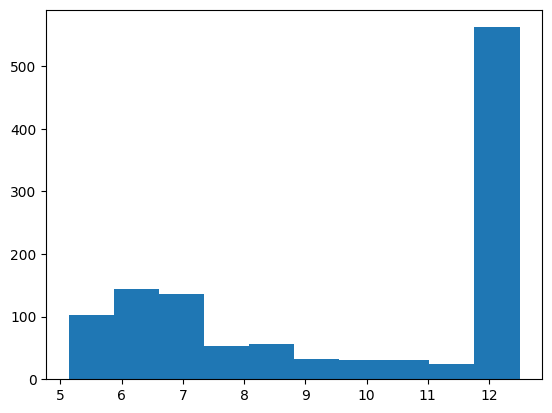

In [9]:
plt.hist(magnitudes_diffuse_sphere)

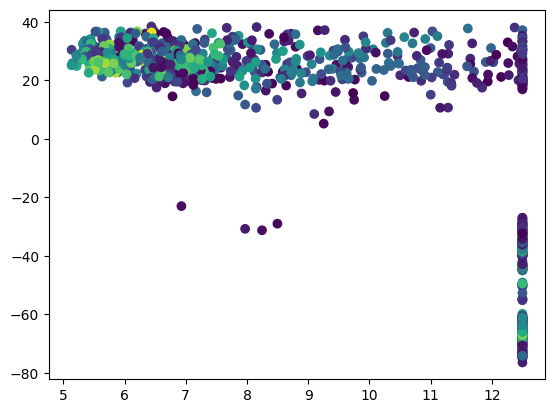

In [13]:
plt.scatter(magnitudes_diffuse_sphere, sun_alts, c = satellite_altitudes)

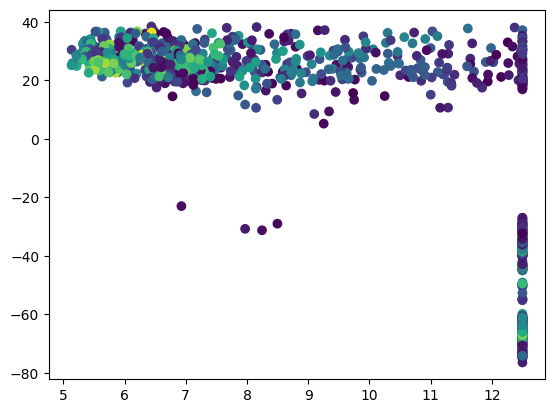

In [5]:
plt.scatter(magnitudes_diffuse_sphere, sun_alts, c = satellite_altitudes)

In [31]:
lumos.constants.SUN_INTENSITY

1360